In [2]:
import os
import pickle
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

sys.path.append("../")

In [2]:
from plot_functions import add_poly, plot_shp_line, plot_shp_poly
from utils import from_pickle, to_pickle

In [3]:
os.makedirs("outputs/", exist_ok=True)

In [4]:
mpl.rcParams["grid.linestyle"] = ":"
mpl.rcParams["axes.grid"] = True

In [5]:
GEOPHYS_DIR = "D:/03 UofA/02 Code/MPM/QUEST Northwest/Geophys/"
GEOCHEM_DIR = "D:/03 UofA/02 Code/MPM/QUEST Northwest/Geochem/"
GEO_DIR = "D:/03 UofA/02 Code/MPM/QUEST Northwest/BC_digital_geology_shp/"

In [6]:
alpha_shape = from_pickle("./outputs/boundary_poly.pkl")

# Excel Data

<img src="geochem_format.png" />

## Report 05

In [7]:
xcol = "UTME83"
ycol = "UTMN83"

In [8]:
report_05 = pd.read_excel(
    GEOCHEM_DIR + "GBCReport_2012-05/GBC REPORT 2012-05.xls", sheet_name=None
)
report_05.keys()

dict_keys(['ORIGINAL FIELD DATA', 'ORIGINAL LAB DATA', 'SEDIMENT INAA DATA', 'SEDIMENT ICPMS DATA1', 'SEDIMENT ICPMS DATA2', 'CODES'])

In [9]:
report_05_geochem = report_05["SEDIMENT ICPMS DATA2"].copy()

In [10]:
report_05_geochem.columns

Index(['IDORDER', 'REPORT', 'NAME', 'TYPE1', 'TYPE2', 'MASTERID', 'MAP250',
       'MAP50', 'MAP20', 'YEAR', 'ID', 'STATUS', 'UTMZ', 'UTME83', 'UTMN83',
       'LAT', 'LONG', 'ELEV', 'STRAT', 'LAB', 'MTHD', 'AU_ICP_PPB',
       'AG_ICP_PPB', 'AL_ICP_PCT', 'AS_ICP_PPM', 'BA_ICP_PPM', 'BI_ICP_PPM',
       'B_ICP_PPM', 'CA_ICP_PCT', 'CD_ICP_PPM', 'CO_ICP_PPM', 'CR_ICP_PPM',
       'CU_ICP_PPM', 'FE_ICP_PCT', 'GA_ICP_PPM', 'HG_ICP_PPB', 'K_ICP_PCT',
       'LA_ICP_PPM', 'MG_ICP_PCT', 'MN_ICP_PPM', 'MO_ICP_PPM', 'NA_ICP_PCT',
       'NI_ICP_PPM', 'P_ICP_PCT', 'PB_ICP_PPM', 'S_ICP_PCT', 'SB_ICP_PPM',
       'SC_ICP_PPM', 'SE_ICP_PPM', 'SR_ICP_PPM', 'TE_ICP_PPM', 'TH_ICP_PPM',
       'TI_ICP_PCT', 'TL_ICP_PPM', 'U_ICP_PPM', 'V_ICP_PPM', 'W_ICP_PPM',
       'ZN_ICP_PPM', 'BE_ICP_PPM', 'CE_ICP_PPM', 'CS_ICP_PPM', 'GE_ICP_PPM',
       'HF_ICP_PPM', 'IN_ICP_PPM', 'LI_ICP_PPM', 'NB_ICP_PPM', 'PT_ICP_PPB',
       'PD_ICP_PPB', 'RE_ICP_PPB', 'RB_ICP_PPM', 'SN_ICP_PPM', 'TA_ICP_PPM',
       'Y_ICP_PP

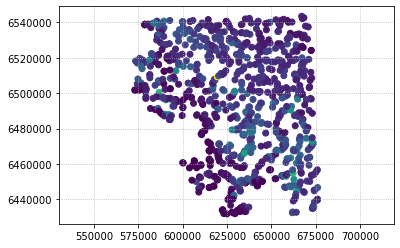

In [11]:
fig, ax = plt.subplots()
ax.scatter(
    report_05_geochem[xcol],
    report_05_geochem[ycol],
    c=report_05_geochem["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

## Report 06

In [12]:
report_06 = pd.read_excel(
    GEOCHEM_DIR + "GBCReport_2012-06/GBC REPORT 2012-06.xls", sheet_name=None
)
report_06.keys()

dict_keys(['ORIGINAL FIELD DATA', 'ORIGINAL LAB DATA', 'SEDIMENT ICPMS DATA', 'SEDIMENT INAA DATA1', 'SEDIMENT INAA DATA2', 'CODES'])

In [13]:
report_06_geochem = report_06["SEDIMENT ICPMS DATA"].copy()

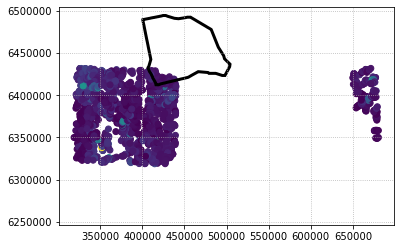

In [14]:
fig, ax = plt.subplots()
ax.scatter(
    report_06_geochem[xcol],
    report_06_geochem[ycol],
    c=report_06_geochem["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

## Report 07

In [15]:
report_07A = pd.read_excel(
    GEOCHEM_DIR + "GBCReport_2012-07/GBC REPORT 2012-07A CORRECTED.xls",
    sheet_name=None,
)
report_07A.keys()

dict_keys(['FIELD DATA', 'SEDIMENT ICPMS DATA1', 'SEDIMENT ICPMS DATA2', 'SEDIMENT INAA DATA1', 'SEDIMENT INAA DATA2', 'OTHER DATA', 'CODES'])

In [16]:
report_07A_geochem = report_07A["SEDIMENT ICPMS DATA2"].copy()
report_07A_geochem.columns

Index(['IDORDER', 'QUEST NW AREA', 'REPORT', 'NAME', 'TYPE1', 'TYPE2',
       'MASTERID', 'MAP250', 'MAP50', 'MAP20', 'YEAR', 'ID', 'STATUS', 'UTMZ',
       'UTME83', 'UTMN83', 'LAT', 'LONG', 'ELEV', 'STRAT', 'LAB', 'MTHD',
       'AU_ICP_PPB', 'AG_ICP_PPB', 'AL_ICP_PCT', 'AS_ICP_PPM', 'BA_ICP_PCT',
       'BI_ICP_PPM', 'B_ICP_PPM', 'CA_ICP_PPM', 'CD_ICP_PPM', 'CO_ICP_PPM',
       'CR_ICP_PPM', 'CU_ICP_PPM', 'FE_ICP_PCT', 'GA_ICP_PPM', 'HG_ICP_PPB',
       'K_ICP_PCT', 'LA_ICP_PPM', 'MG_ICP_PCT', 'MN_ICP_PPM', 'MO_ICP_PPM',
       'NA_ICP_PCT', 'NI_ICP_PPM', 'P_ICP_PCT', 'PB_ICP_PPM', 'S_ICP_PCT',
       'SB_ICP_PPM', 'SC_ICP_PPM', 'SE_ICP_PPM', 'SR_ICP_PPM', 'TE_ICP_PPM',
       'TH_ICP_PPM', 'TI_ICP_PCT', 'TL_ICP_PPM', 'U_ICP_PPM', 'V_ICP_PPM',
       'W_ICP_PPM', 'ZN_ICP_PPM', 'BE_ICP_PPM', 'CE_ICP_PPM', 'CS_ICP_PPM',
       'GE_ICP_PPM', 'HF_ICP_PPM', 'IN_ICP_PPM', 'LI_ICP_PPM', 'NB_ICP_PPM',
       'PT_ICP_PPB', 'PD_ICP_PPB', 'RE_ICP_PPB', 'RB_ICP_PPM', 'SN_ICP_PPM',
       'TA_IC

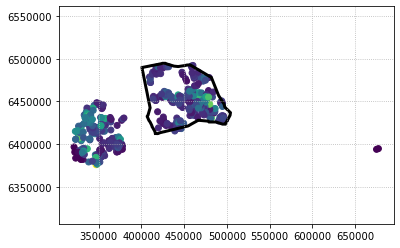

In [17]:
fig, ax = plt.subplots()
ax.scatter(
    report_07A_geochem[xcol],
    report_07A_geochem[ycol],
    c=report_07A_geochem["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

In [18]:
report_07A_geochem["QUEST NW AREA"].unique()

array(['TELEGRAPH CREEK', 'DEASE LAKE'], dtype=object)

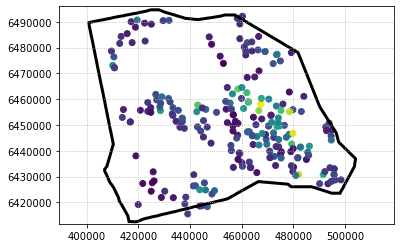

In [19]:
report_07A_geochem = report_07A_geochem.loc[
    report_07A_geochem["QUEST NW AREA"] == "DEASE LAKE"
]
fig, ax = plt.subplots()
ax.scatter(
    report_07A_geochem[xcol],
    report_07A_geochem[ycol],
    c=report_07A_geochem["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

In [20]:
report_07B = pd.read_excel(
    GEOCHEM_DIR + "GBCReport_2012-07/GBC REPORT 2012-07B.xls", sheet_name=None
)
report_07B.keys()

dict_keys(['FIELD DATA', 'SEDIMENT ORIGINAL DATA', 'SEDIMENT ICPMS DATA', 'SEDIMENT INAA DATA', 'OTHER DATA', 'CODES'])

In [21]:
report_07B_geochem = report_07B["SEDIMENT ICPMS DATA"].copy()
report_07B_geochem.columns

Index(['IDORDER', 'QUEST NW AREA', 'REPORT', 'NAME', 'TYPE1', 'TYPE2',
       'MASTERID', 'MAP250', 'MAP50', 'MAP20', 'YEAR', 'ID', 'STATUS', 'UTMZ',
       'UTME83', 'UTMN83', 'LAT', 'LONG', 'ELEV', 'STRAT', 'LAB', 'MTHD',
       'AU_ICP_PPB', 'AG_ICP_PPB', 'AL_ICP_PCT', 'AS_ICP_PPM', 'BA_ICP_PPM',
       'BI_ICP_PPM', 'B_ICP_PPM', 'CA_ICP_PCT', 'CD_ICP_PPM', 'CO_ICP_PPM',
       'CR_ICP_PPM', 'CU_ICP_PPM', 'FE_ICP_PCT', 'GA_ICP_PPM', 'HG_ICP_PPB',
       'K_ICP_PCT', 'LA_ICP_PPM', 'MG_ICP_PCT', 'MN_ICP_PPM', 'MO_ICP_PPM',
       'NA_ICP_PCT', 'NI_ICP_PPM', 'P_ICP_PCT', 'PB_ICP_PPM', 'S_ICP_PCT',
       'SB_ICP_PPM', 'SC_ICP_PPM', 'SE_ICP_PPM', 'SR_ICP_PPM', 'TE_ICP_PPM',
       'TH_ICP_PPM', 'TI_ICP_PCT', 'TL_ICP_PPM', 'U_ICP_PPM', 'V_ICP_PPM',
       'W_ICP_PPM', 'ZN_ICP_PPM', 'BE_ICP_PPM', 'CE_ICP_PPM', 'CS_ICP_PPM',
       'GE_ICP_PPM', 'HF_ICP_PPM', 'IN_ICP_PPM', 'LI_ICP_PPM', 'NB_ICP_PPM',
       'PT_ICP_PPB', 'PD_ICP_PPB', 'RE_ICP_PPB', 'RB_ICP_PPM', 'SN_ICP_PPM',
       'TA_IC

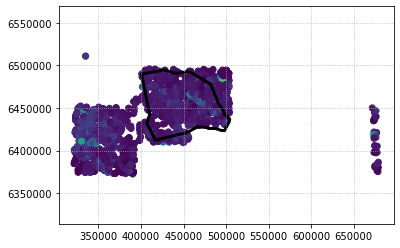

In [22]:
fig, ax = plt.subplots()
ax.scatter(
    report_07B_geochem[xcol],
    report_07B_geochem[ycol],
    c=report_07B_geochem["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

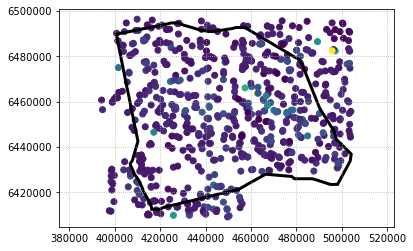

In [23]:
report_07B_geochem = report_07B_geochem.loc[
    (report_07B_geochem["QUEST NW AREA"] == "DEASE LAKE")
    & (report_07B_geochem[xcol] > 350000)
]
fig, ax = plt.subplots()
ax.scatter(
    report_07B_geochem[xcol],
    report_07B_geochem[ycol],
    c=report_07B_geochem["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

In [24]:
merged = pd.concat([report_07A_geochem, report_07B_geochem], axis=0)

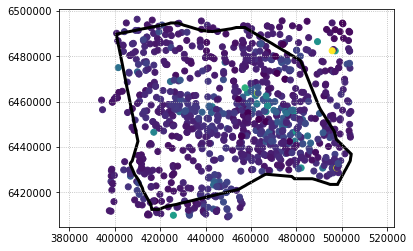

In [25]:
fig, ax = plt.subplots()
ax.scatter(
    merged[xcol], merged[ycol], c=merged["CU_ICP_PPM"],
)
ax.axis("equal")
add_poly(ax, alpha_shape, {"fill": False, "lw": 3})

# EDA
- We will take the data from reports 07A and 07B
- Check the columns are the same before merging them

In [26]:
sum(report_07A_geochem.columns == report_07B_geochem.columns) == len(
    report_07B_geochem.columns
)

False

In [27]:
len(report_07A_geochem), len(report_07B_geochem)

(229, 680)

In [28]:
# cols in 7A not in 7B
cols1 = report_07A_geochem.columns[
    ~report_07A_geochem.columns.isin(report_07B_geochem.columns)
]
cols1

Index(['BA_ICP_PCT', 'CA_ICP_PPM'], dtype='object')

In [29]:
# cols in 7B not in 7A
cols2 = report_07B_geochem.columns[
    ~report_07B_geochem.columns.isin(report_07A_geochem.columns)
]
cols2

Index(['BA_ICP_PPM', 'CA_ICP_PCT'], dtype='object')

In [30]:
report_07A_geochem.rename(dict(zip(cols1, cols2)), inplace=True, axis=1)

In [31]:
sum(report_07A_geochem.columns == report_07B_geochem.columns) == len(
    report_07B_geochem.columns
)

True

In [32]:
df = pd.concat([report_07A_geochem, report_07B_geochem], axis=0)

In [33]:
data_cols = [
    col for col in df.columns if "_PPM" in col or "_PCT" in col or "_PPB" in col
]
df[data_cols].shape

(909, 53)

In [34]:
# replace -1 with NaN
df[df == -1] = np.nan

# simple imputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
df[data_cols] = imp_mean.fit_transform(df[data_cols])

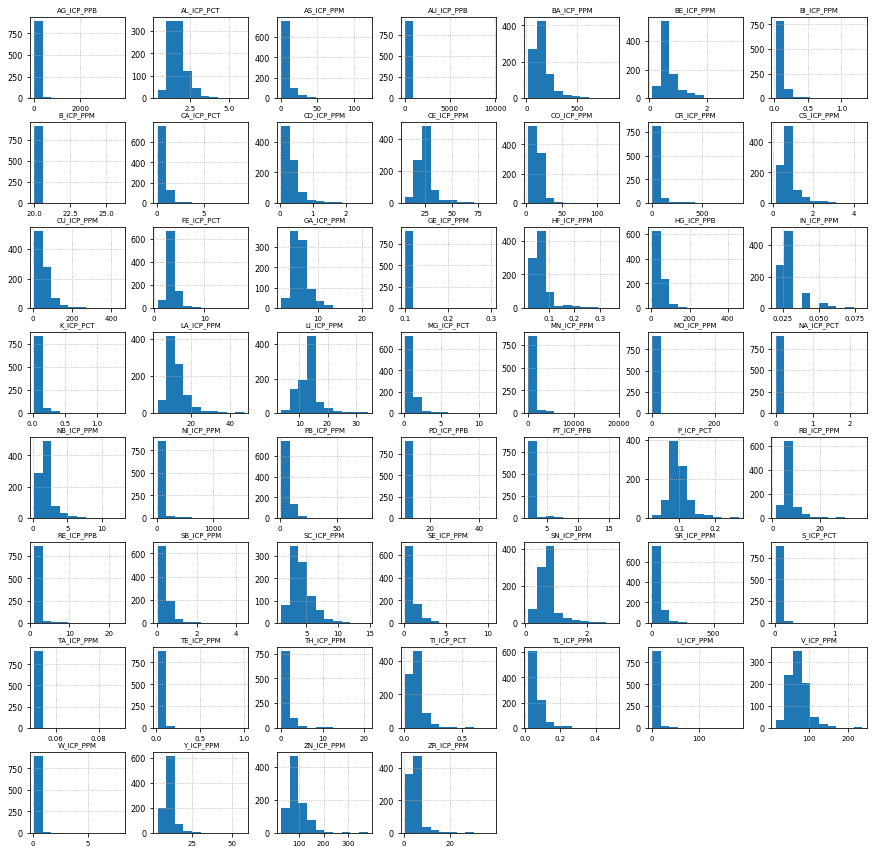

In [35]:
axes = df[data_cols].hist(xlabelsize=7, ylabelsize=8, figsize=(15, 15))
axes = axes.flatten()
for ax in axes:
    ax.title.set_fontsize(7)

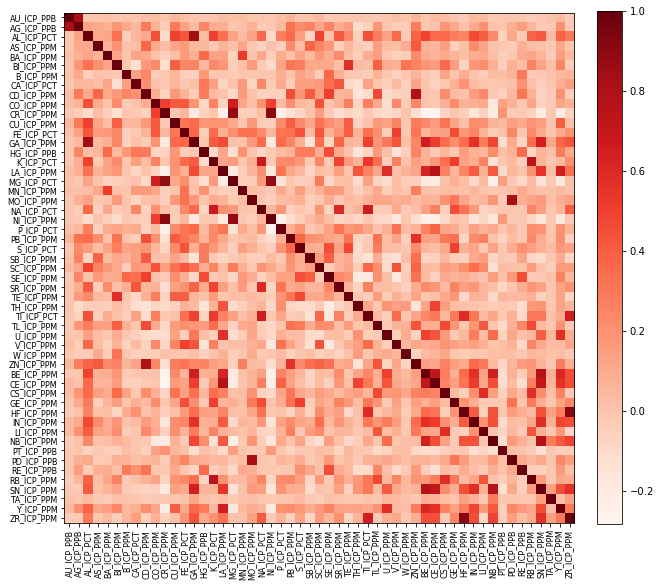

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = df[data_cols].corr()
im = ax.imshow(corr, cmap="Reds")
ax.set_xticks(np.arange(len(df[data_cols].columns)))
ax.set_xticklabels(
    df[data_cols].columns, rotation=90, fontsize=8,
)
ax.set_yticks(np.arange(len(df[data_cols].columns)))
ax.set_yticklabels(df[data_cols].columns, rotation=0, fontsize=8, ha="right")
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.grid(None)

In [37]:
X = StandardScaler().fit_transform(df[data_cols])
pca = PCA(whiten=False).fit(X)

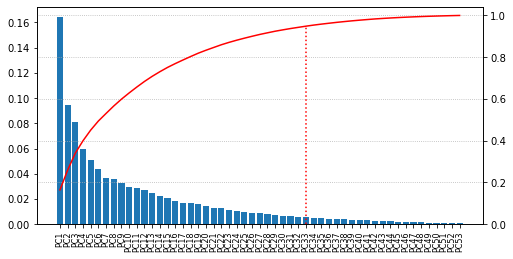

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))
ax2 = ax.twinx()
ax.bar(np.arange(X.shape[1]), pca.explained_variance_ratio_)
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(
    [f"PC{i+1}" for i in range(X.shape[1])], rotation=90, fontsize=8
)
ax2.plot(np.cumsum(pca.explained_variance_ratio_), c="r")
ax2.set_ylim(0)
q = 0.95
ax2.vlines(
    int(
        np.interp(
            q, np.cumsum(pca.explained_variance_ratio_), np.arange(X.shape[1])
        )
    ),
    ymin=0,
    ymax=q,
    color="r",
    ls=":",
)
ax.grid(None)

The first 33 components explain 95% of the total variance

In [39]:
X = StandardScaler().fit_transform(df[data_cols])
n_components = 33
pca_arr = PCA(n_components=n_components, whiten=False).fit_transform(X)

In [40]:
coords = df[[xcol, ycol]].copy()
df_pca = pd.DataFrame(
    data=pca_arr, columns=[f"PC{i+1}" for i in range(n_components)]
)
coords.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)
df_pca = pd.concat([coords, df_pca], axis=1)

In [41]:
df_pca.head()

,UTME83,UTMN83,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,439091,6415506,-0.079979,0.549174,-0.782881,2.181584,0.136012,-0.821690,-0.838779,0.235040,...,-0.152812,0.149020,0.533922,0.019419,-0.273257,0.978231,-0.422047,0.144054,-0.063133,1.012145
1,437973,6419403,-0.114893,0.439808,1.756196,0.557156,-0.341690,-0.671688,-2.192387,0.001918,...,0.059601,-0.089734,0.820908,0.020945,-0.188031,0.029396,-0.741319,0.184358,-0.221196,0.850047
2,438342,6422004,-0.699313,0.280921,1.371967,-0.609827,-0.398099,-1.022822,-1.703433,-0.205389,...,-0.001074,-0.360778,1.353621,0.184892,-0.046576,0.333583,-0.332135,-0.457401,-0.178501,0.864323
3,441433,6430692,-0.748119,0.265881,1.040766,0.532252,0.363340,-0.673632,-0.931611,0.244033,...,0.493520,0.019976,0.788966,0.408181,-0.760444,0.102036,0.363984,0.219068,0.331612,0.712216
4,496234,6428632,-0.495855,-0.794947,1.087852,0.114281,0.421837,-1.078450,-0.398282,0.486594,...,-0.630119,-0.510940,1.738419,-0.805799,1.012469,-0.082061,-0.144870,0.588839,0.009047,0.256478


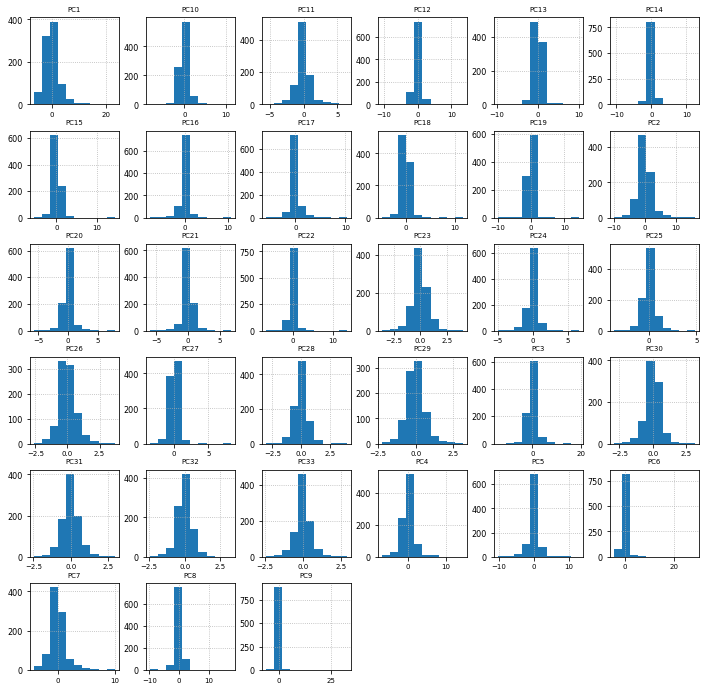

In [42]:
axes = df_pca.iloc[:, 2:].hist(xlabelsize=7, ylabelsize=8, figsize=(12, 12))
axes = axes.flatten()
for ax in axes:
    ax.title.set_fontsize(7)

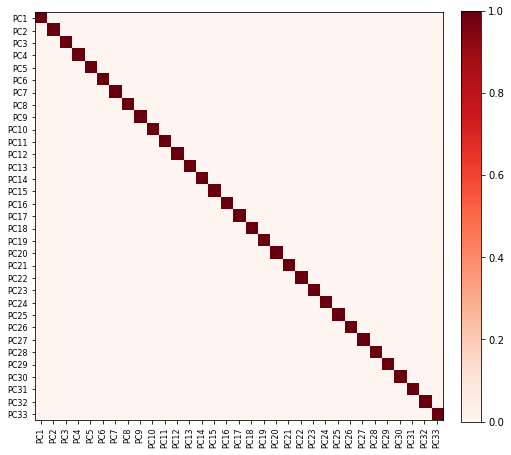

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
corr = df_pca.iloc[:, 2:].corr()
im = ax.imshow(corr, cmap="Reds")
ax.set_xticks(np.arange(len(df_pca.iloc[:, 2:].columns)))
ax.set_xticklabels(
    df_pca.iloc[:, 2:].columns, rotation=90, fontsize=8,
)
ax.set_yticks(np.arange(len(df_pca.iloc[:, 2:].columns)))
ax.set_yticklabels(
    df_pca.iloc[:, 2:].columns, rotation=0, fontsize=8, ha="right"
)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.grid(None)

# Estimation
- Infer grid definition which matches origin and resoultion of raster images
- IDW (or global kriging?) of components

In [354]:
import rmsp

rmsp.activate()

License c503b5771e600692 checked out by rms_ben to 35e7524ac02421e0 expires in 39 minutes. RMSP Version 1.8.9 is up to date!


In [355]:
nynx, origin = from_pickle("outputs/grid_origin.pkl")
mask = from_pickle("./outputs/keyout.pkl")

mask = np.flipud(mask).flatten()

In [357]:
xsize_fine = 25
ysize_fine = 25
nx_fine = nynx[1]
ny_fine = nynx[0]
xsize = 100
ysize = 100
nx = np.ceil(nx_fine / (xsize / xsize_fine))
ny = np.ceil(ny_fine / (ysize / ysize_fine))
print(nx, ny, origin)

1072.0 859.0 ((6410638.793103448, 6496458.793429581), (398838.7931034483, 506018.7935107538))


In [358]:
griddef = rmsp.GridDef(
    xcmin=origin[1][0],
    ycmin=origin[0][0],
    zcmin=0.5,
    nu=nx,
    nv=ny,
    nz=1,
    usize=xsize,
    vsize=ysize,
    zsize=1,
    blockindices=np.arange(nx * ny),
    lower_left_corner=True,
)
grid = rmsp.GridData(griddef=griddef)
print(griddef.to_table())

               Easting    Northing
minimum (m)  398838.79  6410638.79
maximum (m)  506038.79  6496538.79
size (m)           100         100
number            1072         859


In [359]:
df_pca = rmsp.PointData(data=df_pca, x=xcol, y=ycol)

(<matplotlib.cm.ScalarMappable at 0x1fab80a3c08>, None, None)

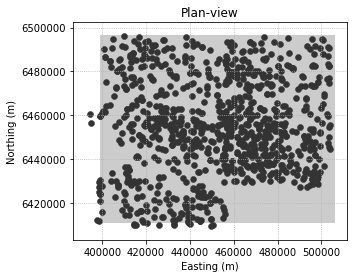

In [360]:
fig, ax, cax = df_pca.sectionplot("0.2")
grid.sectionplot_draw(ax=ax, var="0.8")

In [364]:
search = rmsp.Search(
    angles=[135.0, 0.0, 0.0], ranges=[40000.0, 40000.0, 1.0], min_comps=5
)
idw = rmsp.IDWEstimator().set_params(search, power=2)

for ic in range(n_components):
    grid[f"PC{ic+1}"] = idw.estimate(grid, df_pca, f"PC{ic+1}")

In [1]:
grid.sectionplot("PC1")

NameError: name 'grid' is not defined

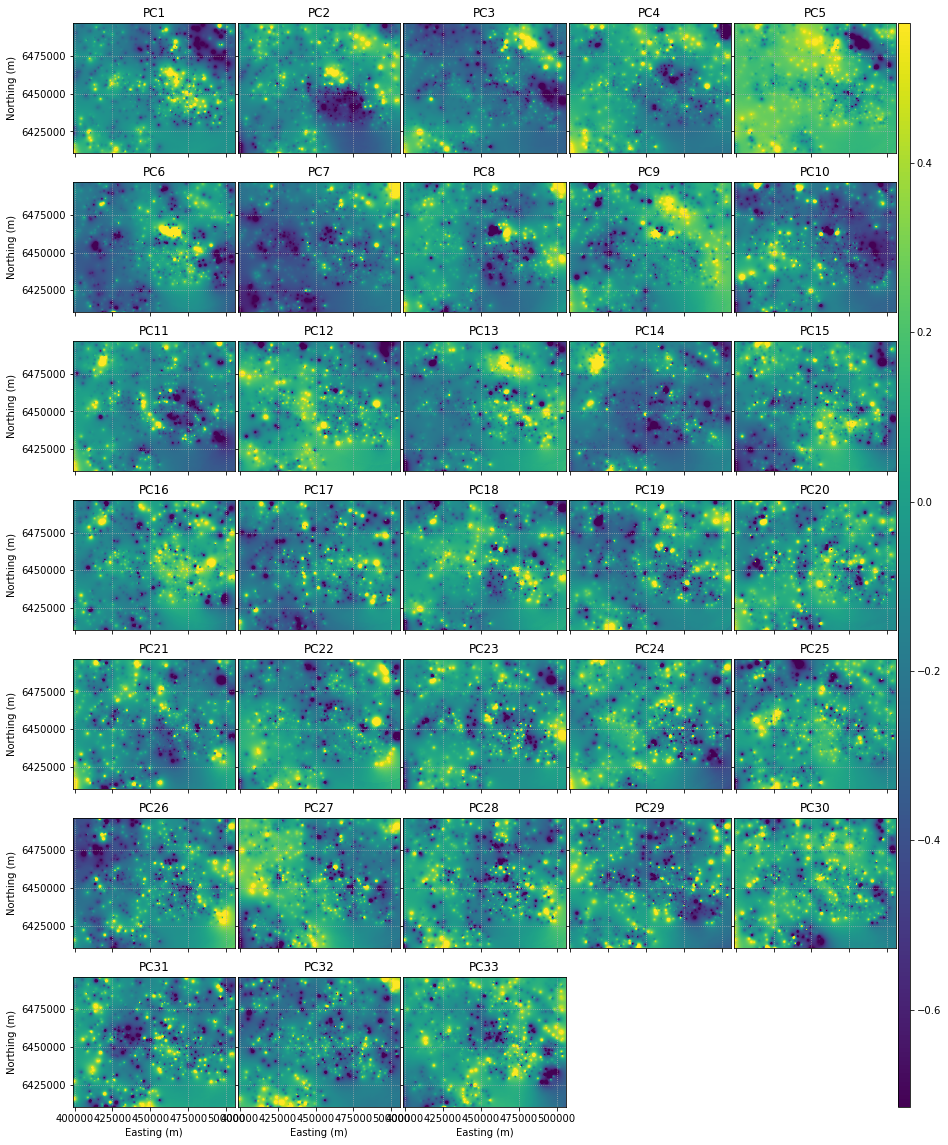

In [366]:
fig, axes = rmsp.ImageGrid(
    7, 5, figsize=(15, 20), cbar_mode="single", cbar_size="1.0%"
)
for ic in range(n_components):
    grid.sectionplot(f"PC{ic+1}", ax=axes[ic])

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

In [375]:
# downscale to match other grid
grid_ds = grid.change_cell_size(xsize_fine, ysize_fine, 1, maintain_origin=True)
grid_ds.sort_index(inplace=True)

In [376]:
print(grid_ds.griddef.to_table())

               Easting    Northing
minimum (m)  398838.79  6410638.79
maximum (m)  506038.79  6496538.79
size (m)            25          25
number            4288        3436


In [381]:
pca_grid = grid_ds.values.reshape(
    grid_ds.griddef.ny, grid_ds.griddef.nx, n_components
)
print(pca_grid.shape)

(3436, 4288, 33)


In [387]:
# clip due to differences in ceil/floor between QGIS and rmsp
# everything else starts top left so flip to match
pca_grid = np.flipud(pca_grid[:ny_fine, :nx_fine, :])
print(pca_grid.shape)

(3433, 4287, 33)


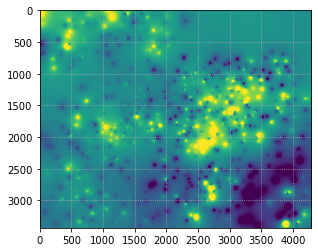

In [388]:
plt.imshow(pca_grid[:, :, 0], vmin=-3.5, vmax=3.5)

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.CbarAxes at 0x207f80b01c8>)

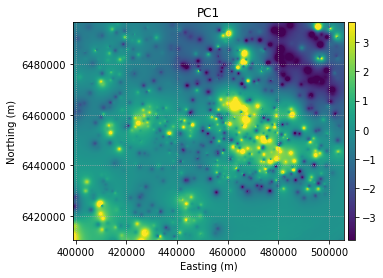

In [389]:
grid.sectionplot("PC1")

In [390]:
geochem_channels = {"pca": pca_grid}

In [391]:
# tensor shapes
for key, value in geochem_channels.items():
    print(key + " shape:", value.shape)

pca shape: (3433, 4287, 33)


In [392]:
to_pickle("./outputs/geochem_channels.pkl", geochem_channels)